#Importing Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Exploring Data

In [23]:
df=pd.read_csv("Housing.csv")

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning

In [26]:
#checking missing values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

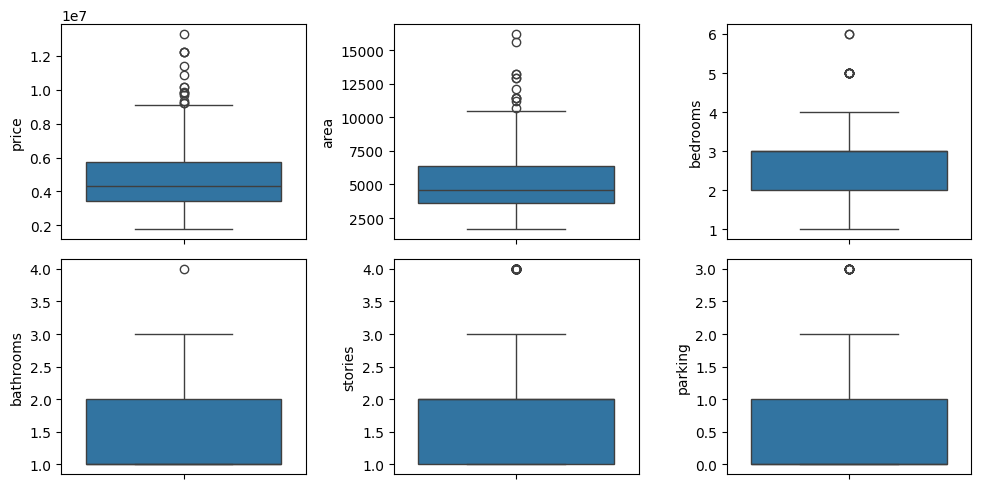

In [27]:
#detecting outliers
fig,axs=plt.subplots(2,3,figsize=(10,5))
plt1=sns.boxplot(df['price'],ax=axs[0,0])
plt2=sns.boxplot(df['area'],ax=axs[0,1])
plt2=sns.boxplot(df['bedrooms'],ax=axs[0,2])
plt2=sns.boxplot(df['bathrooms'],ax=axs[1,0])
plt2=sns.boxplot(df['stories'],ax=axs[1,1])
plt2=sns.boxplot(df['parking'],ax=axs[1,2])
plt.tight_layout()

<Axes: ylabel='price'>

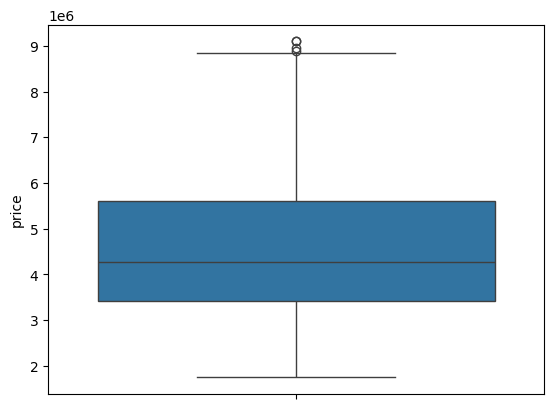

In [28]:
#as Price and Area have many outliers so droping it using IQR
Q1=df.price.quantile(0.25)
Q3=df.price.quantile(0.75)
IQR=Q3-Q1
df=df[(df.price>=Q1-1.5*IQR)&(df.price<=Q3+1.5*IQR)]
sns.boxplot(df.price)

<Axes: ylabel='area'>

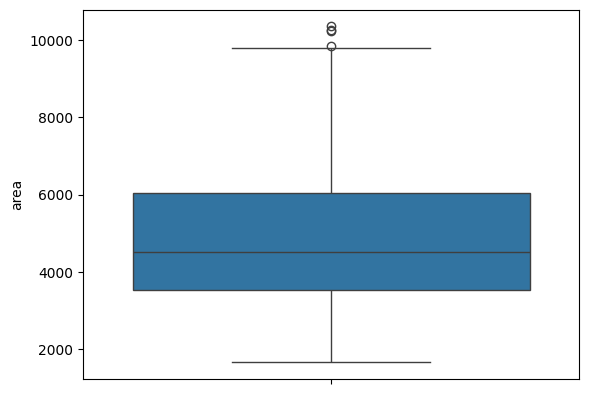

In [29]:
Q1=df.area.quantile(0.25)
Q3=df.area.quantile(0.75)
IQR=Q3-Q1
df=df[(df.area>=Q1-1.5*IQR)&(df.area<=Q3+1.5*IQR)]
sns.boxplot(df.area)

#Preparing Data

In [33]:
#convert Yes no data to 1 and 0
varlist=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def func(x):
  return x.map({'yes':1,'no':0})
df[varlist]=df[varlist].apply(func)

In [34]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [41]:
#now converting furnishingstatus to binary
fstatus=pd.get_dummies(df['furnishingstatus'])

In [42]:
fstatus.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [44]:
#as we can only need 2 category so removing 2nd coloumn
fstatus=pd.get_dummies(df['furnishingstatus'],drop_first=True)
fstatus.head()

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0


In [45]:
df=pd.concat([df,fstatus],axis=1)

In [46]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [47]:
df.drop(['furnishingstatus'],axis=1,inplace=True)

In [48]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


#Splitting into Training and Testing

In [71]:
np.random.seed(23)
df_train,df_test=train_test_split(df,test_size=0.3,random_state=100)

In [72]:
y_train=df_train.pop('price')
y_test=df_test.pop('price')
X_train=df_train
X_test=df_test

In [67]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,6360,3,1,3,1,0,0,0,0,0,1,1,0
236,2870,2,1,2,1,1,1,0,0,0,1,1,0
356,2520,5,2,1,0,0,1,0,1,1,0,0,0
425,3185,2,1,1,1,0,1,0,0,2,0,0,0
516,3240,2,1,1,0,1,0,0,0,1,0,0,1


In [68]:
y_train.head()

148    5600000
236    4620000
356    3773000
425    3360000
516    2450000
Name: price, dtype: int64

#Fitting Model

In [74]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)

In [76]:
r2_score(y_test,y_pred)

0.6588631889290744